In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from util_tools.operators import *
from util_tools.update_funcs import *
#problem constants
var_dict = {}
nu_c=var_dict['nu_c']=1e-6
mu_c=var_dict['mu_c']=1e-3
rho_c=var_dict['rho_c']=1e+3
st_coef=0.06
#real timestep
dt=0.000001
gradP=-2.4
from tqdm import tqdm
n_iter=0
global epstot
'''
node generation section
'''
#domain length

Lx1=0.02;Lx2=0.01;r_dpl=Lx2/4;M=3.0;u1_ave=0.02;nx1=100;nx2=50;Nx1=nx1+1;Nx2=nx2+2
h=Lx1/nx1

#var_dict = {'Lx1' : Lx1, 'Lx2' : Lx2, 'r_dpl': r_dpl,'h': h,'u1_ave'  : u1_ave,'M':M,nx1=100;nx2=50,Nx1=nx1+1,Nx2=nx2+1,'dt':dt,'gradP':gradP,'st_coef':st_coef,'nu_c':nu_c,'mu_c':mu_c,'rho_c':rho_c}
var_dict = {'Lx1' : Lx1, 'Lx2' : Lx2, 'r_dpl': r_dpl,'h': h,'u1_ave'  : u1_ave,'M' : M,'nx1':nx1,'nx2':nx2,'dt':dt,'gradP':gradP,'st_coef':st_coef,'nu_c':nu_c,'mu_c':mu_c,'rho_c':rho_c}

#Initialization
un=np.zeros([Nx1,Nx2])
us=np.zeros([Nx1,Nx2])
unn=np.zeros([Nx1,Nx2])
u_ref=np.zeros([Nx1,Nx2])

vn=np.zeros([Nx1,Nx2])
vs=np.zeros([Nx1,Nx2])
vnn=np.zeros([Nx1,Nx2])
#u_ref=np.zeros([UNx1+1,UNx2])


pn=np.zeros([nx1,nx2])
pnn=np.zeros([nx1,nx2])


rho_u=np.zeros([nx1,nx2])
mu_u=np.zeros([nx1,nx2])


phin=np.zeros( [Nx1,Nx2] )
phis=np.zeros([Nx1,Nx2])
phinn=np.zeros([Nx1,Nx2])
Tx1,Tx2=17,15

#half_index_grid
hig_x, hig_y = np.meshgrid(np.linspace(0, Lx1, num=Nx1),np.linspace(0-h, Lx2,Nx2),indexing='ij')
# #full_index_grid
xi, xj = np.meshgrid(np.round(np.linspace(0+h/2, Lx1-h/2, num=Tx1),4),np.round(np.linspace(0+h/2, Lx2-h/2,nx2),4),indexing='ij')

# #lvlset init
phin=lvlset_init(xi, xj,var_dict)
rho=rho_distr(phin,var_dict)
mu=mu_distr(phin,var_dict)
un=ref_vel_prof(hig_y)


In [18]:
phin

array([[0.0001, 0.0001, 0.0001, ..., 0.0001, 0.0001, 0.0001],
       [0.0003, 0.0003, 0.0003, ..., 0.0003, 0.0003, 0.0003],
       [0.0005, 0.0005, 0.0005, ..., 0.0005, 0.0005, 0.0005],
       ...,
       [0.0195, 0.0195, 0.0195, ..., 0.0195, 0.0195, 0.0195],
       [0.0197, 0.0197, 0.0197, ..., 0.0197, 0.0197, 0.0197],
       [0.0199, 0.0199, 0.0199, ..., 0.0199, 0.0199, 0.0199]])

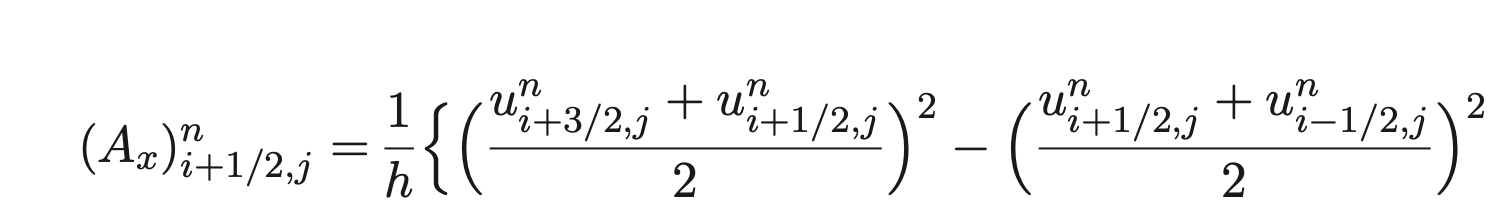

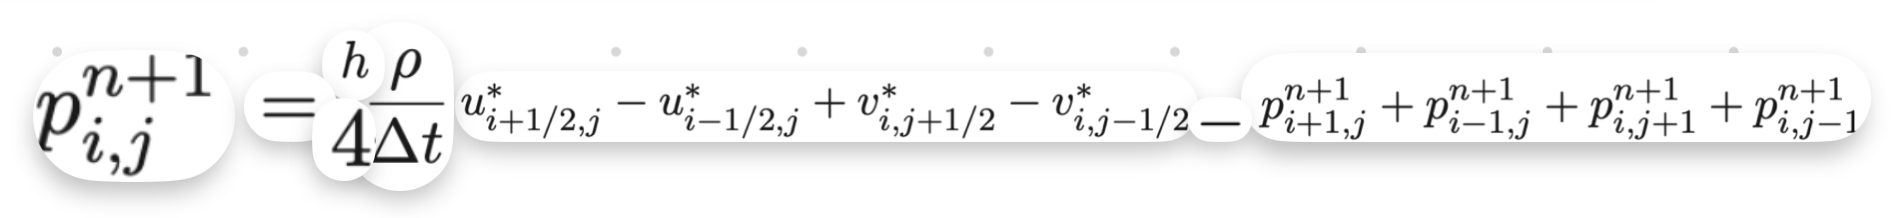

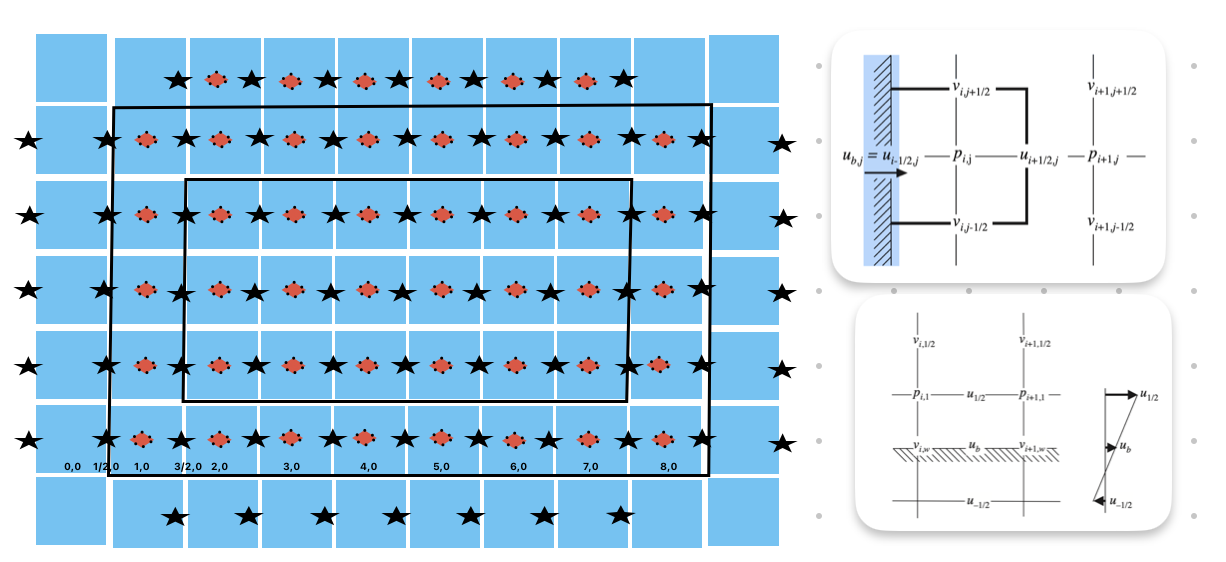

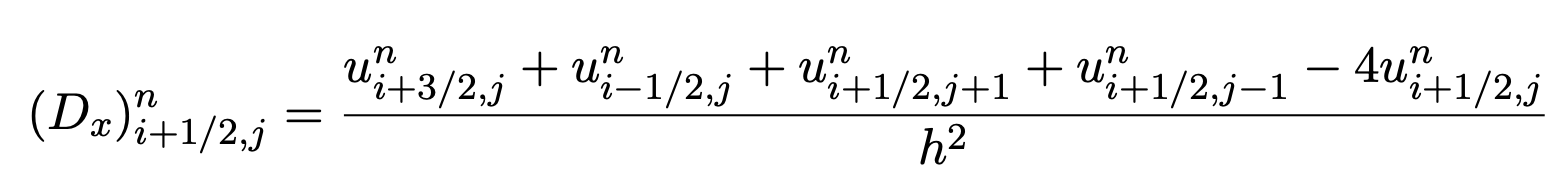

In [ ]:
us=predictor(un,vn, mu, rho, us,var_dict)
us=BC_looper(us)
res=1000
kl=0
while res>1e-3:
    kl=kl+1
    pnn=projector( us, vs, pn,rho, pnn,var_dict)
    q=LA.norm(pnn-pn)
    if abs(res-q)>=0.0001:
        break
    res=q
    if kl%500==0:
        print(res)
    pn=pnn.copy()
# unn=corrector(us, pnn, unn, rho,var_dict)
# unn=BC_looper(unn)
# un=unn.copy()

In [ ]:
us[1:,1:-1]=un[1:,1:-1]+dt*((mu/rho)*Dif_x_n(un,var_dict)-Adv_x_n(un,vn,var_dict))

In [ ]:
qo=Dif_x_n(un,var_dict)

In [ ]:
pnn=projector( us, vs, pn,rho, pnn,var_dict)

In [ ]:
unn=corrector(us, pnn, unn, rho,var_dict)

In [ ]:
unn=BC_looper(unn)

In [ ]:
plt.imshow(unn.T)

In [ ]:
plt.imshow(pnn.T)
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(un.T)
plt.colorbar()
plt.show()

In [ ]:
lphi=L_phi(phin,un,0,var_dict)

In [ ]:
L_phi_s,phis=phis_predictor(phis,phin,un,vn,var_dict)

In [ ]:
for yt in tqdm(range(3)):
    us=predictor(un,vn, mu, rho, us,var_dict)
    us=BC_looper(us,var_dict)
    res=1000
    while res>1e-3:
        pnn=projector( us, vs, pn,rho, pnn,var_dict)
        res=LA.norm(pnn-pn)
        pn=pnn.copy()
    pnn=BC_looper(pnn,var_dict)
    unn=corrector(us, pnn, unn, rho,var_dict)
    unn=BC_looper(unn,var_dict)

    L_phi_s,phis=phis_predictor(phis,phin,un,vn,var_dict)
    phis=BC_looper(phis,var_dict)

    phinn=phinn_corrector(L_phi_s,phinn,phin,un,vn,var_dict)
    phinn=BC_looper(phinn,var_dict)

    phin=phinn.copy()

    un=unn.copy()
    var_dict['dt']=var_dict['dt']/5 

In [ ]:
bub=plt.Circle((0.01, 0.005), r_dpl, color='grey', fill=False)
fig, ax=plt.subplots()
plt.contourf(xi, xj, phin, 20, cmap='inferno')
plt.colorbar()
ax.add_artist(bub)
plt.xlabel('$x_1$ (m)')
plt.ylabel('$x_2$ (m)')
plt.title('domain initial level-set, '+str(Nx2), fontsize=9)
plt.gca().set_aspect('equal')
plt.show() 



In [ ]:
plt.contourf(xi, xj, pnn, 20, cmap='inferno')
plt.colorbar()
plt.xlabel('$x_1$ (m)')
plt.ylabel('$x_2$ (m)')
plt.title('domain $p$ contour ($m/s$)')
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
plt.contourf(xi, xj, un, 20, cmap='inferno')
plt.colorbar()
plt.xlabel('$x_1$ (m)')
plt.ylabel('$x_2$ (m)')
plt.title('domain $u_1$ contour ($m/s$)')
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
rho[0:Nx1+2,0:Nx2+2]=rho_distr(phin[0:Nx1+2,0:Nx2+2],var_dict)
mu[0:Nx1+2,0:Nx2+2]=mu_distr(phin[0:Nx1+2,0:Nx2+2],var_dict)
us=us_looper(un,vn, mu, rho, us,var_dict)
us=us_BC_looper(us,var_dict)
res=1000
while res>1e-3:
    pnn=p_looper( us, vs, pn,rho, pnn,var_dict)
    res=LA.norm(pnn-pn)
    pn=pnn.copy()
pnn=p_BC_looper(pnn,var_dict)
unn=unn_looper(us, pnn, unn, rho,var_dict)
unn=unn_BC_looper(unn,var_dict)

phis=phis_looper(phis,phin,un,vn,var_dict)
phis=phis_BC_looper(phis,var_dict)

phinn=phinn_looper(phinn,phis,phin,un,us,vs,vn,var_dict)
phinn=phinn_BC_looper(phinn,var_dict)

phin=phinn.copy()

un=unn.copy()
var_dict['dt']=var_dict['dt']/5